<a href="https://colab.research.google.com/github/JainArpit-07/Facial-Analysis-for-Sex-Classification-and-Age-Regression/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d nipunarora8/age-gender-and-ethnicity-face-data-csv

 90% 57.0M/63.2M [00:01<00:00, 61.5MB/s]
100% 63.2M/63.2M [00:01<00:00, 60.0MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/age-gender-and-ethnicity-face-data-csv.zip')
zip_ref.extractall('/content')
zip_ref.close()

Importing libraries

In [ ]:
import keras
import json
import sys
import tensorflow as tf
from keras.layers import Input
import numpy as np
import argparse
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
df=pd.read_csv("age_gender.csv")
df.head()


,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


(-0.5, 47.5, 47.5, -0.5)

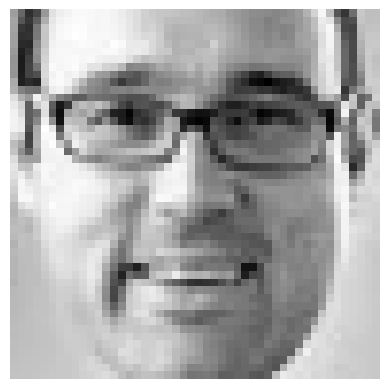

In [ ]:
df1= pd.DataFrame(df)
df1['pixels'] = df1.pixels.apply(lambda x: np.reshape(np.array(x.split(' '),dtype='float32'),(48,48)))
df1['pixels']= df1['pixels']/255
im = df1['pixels'][7707]
im
plt.imshow(im, cmap='gray')
plt.axis('off')

In [ ]:
#To collect all the images and reshape them and check the dtype.

X = np.zeros(shape=(23705,48,48))
for i in range(len(df1["pixels"])):
    X[i] = df1["pixels"][i]
X.dtype

dtype('float64')

In [ ]:
#Age
ag = df1['age']
ag=ag.astype(float)
ag= np.array(ag)
ag.shape

(23705,)

In [ ]:
#gender

g= df1['gender']
g=np.array(g)
g.shape

(23705,)

In [ ]:
labels_f =[]

i=0

while i <len(ag):

  label=[]

  label.append([ag[i]])

  label.append([g[i]])

  labels_f.append(label)

  i+=1

labels_f =np.array(labels_f)
labels_f.shape

(23705, 2, 1)

The code reads in the age_gender.csv file and stores it into a dataframe called df.

  The head() function is then used to display the first five rows of data from the dataframe.

 Next, a new dataframe called df1 is created by copying all values from df.
 Then, using lambda function, each row of pixels column is converted into an array of float32 type and reshaped into 48x48 matrix.
 This matrix represents an image with pixel values ranging between 0-255.

 To normalize these values, each element in this matrix is divided by 255 so that they range between 0-1.

 The next few lines are used to visualize one of the images from the dataset using matplotlib library's imshow() function which displays an image on a grid.

 Then, a numpy array X is initialized with shape (23705,48,48) where 23705 represents number of images in dataset and (48x48) represents dimensions for each image.

 A while loop is then used to iterate through all elements in ag list which contains ages for each person in dataset.

 Inside this loop, label list variable is initialized as empty and current age value at index i from ag list is appended to label list followed by gender value at same index i being appended again but inside another nested list within label list.

 This creates labels_f numpy array with shape (23705,) where every element has two lists containing age and gender information respectively for that particular person/image.

 Finally labels_f numpy array's shape attribute returns tuple representing its dimensions as (23705,)

 The code reads a CSV file, converts the data into a dataframe, reshapes and normalizes the pixel values, and creates an array of labels for each image.

 It then creates a 3D array of images and their corresponding labels.

Splitting the data taking data set

In [ ]:
import tensorflow as tf

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,labels_f,test_size=0.25)

print(X_test.shape)

print(X_train.shape)

print(Y_test.shape)

print(Y_train.shape)

(5927, 48, 48)
(17778, 48, 48)
(5927, 2, 1)
(17778, 2, 1)


In [ ]:
Y_train_2 = [Y_train[:, 1].reshape(-1, 1), Y_train[:, 0].reshape(-1, 1)]
Y_test_2 = [Y_test[:, 1].reshape(-1, 1), Y_test[:, 0].reshape(-1, 1)]

This method changes an array's shape without changing its data elements' order or values.

Here, it creates two separate arrays containing only one column each one with class label '1' and another with class label '0'.

These arrays will be useful when building a neural network model later on as they represent binary classification outputs.

The code attempts to split the data into training and testing sets, and then reshape the labels for further analysis.

#Model

In [ ]:
from tensorflow.keras.layers import Dropout

from tensorflow.keras.layers import Flatten,BatchNormalization

from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D

from tensorflow.keras.layers import Input,Activation,Add

from tensorflow.keras.models import Model

from tensorflow.keras.regularizers import l2

from tensorflow.keras.optimizers import Adam

import tensorflow as tf

def Convolution(input_tensor,filters):

    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.001))(input_tensor)

    x = Dropout(0.1)(x)

    x= Activation('relu')(x)

    return x

def model(input_shape):

  inputs = Input((input_shape))

  conv_1= Convolution(inputs,32)

  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)

  conv_2 = Convolution(maxp_1,64)

  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)

  conv_3 = Convolution(maxp_2,128)

  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)

  conv_4 = Convolution(maxp_3,256)

  maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)

  flatten= Flatten() (maxp_4)

  dense_1= Dense(64,activation='relu')(flatten)

  dense_2= Dense(64,activation='relu')(flatten)

  drop_1=Dropout(0.2)(dense_1)

  drop_2=Dropout(0.2)(dense_2)

  output_1= Dense(1,activation="sigmoid",name='sex_out')(drop_1)

  output_2= Dense(1,activation="relu",name='age_out')(drop_2)

  model = Model(inputs=[inputs], outputs=[output_1,output_2])

  model.compile(loss=["binary_crossentropy","mae"], optimizer="Adam",

  metrics=["accuracy"])

  return model

This code defines a convolutional neural network (CNN) model using TensorFlow's Keras API. Let's break down the code step by step:

1. Import necessary libraries

2. Define the Convolution function:
* This function takes an input tensor and the number of filters as
input. It performs a convolution operation with a kernel size of (3, 3), using the ReLU activation function, and applies dropout regularization with a rate of 0.1.

3. Define the model function:
* This function defines the architecture of the neural network model. It takes the input shape as input and returns a compiled Keras model.
* It starts by defining an input layer with the specified input shape.
* Then, it applies four convolutional layers (each followed by max pooling) using the Convolution function defined earlier.
After the convolutional layers, it flattens the output and passes it through two dense layers with ReLU activation functions and dropout regularization.
* Finally, it defines two output layers, one for binary classification (sigmoid activation) and one for regression (ReLU activation).

4. Compile the model:
* The model is compiled using the Adam optimizer with binary cross-entropy loss for the binary classification task and mean absolute error (MAE) loss for the regression task. Accuracy is used as a metric for evaluation.
* Overall, this code defines a CNN model for a binary classification task (e.g., predicting gender) and a regression task (e.g., predicting age) simultaneously.

In [ ]:
Model=model((48,48,1))
Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 48, 48, 32)           320       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 48, 48, 32)           0         ['conv2d[0][0]']              
                                                                                                  
 activation (Activation)     (None, 48, 48, 32)           0         ['dropout[0][0]']             
                                                                                              

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
callback_list = [EarlyStopping(monitor='val_loss', patience=3), TensorBoard(log_dir='./logs')]
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=10,callbacks=[callback_list])

Epoch 1/10
278/278 [==============================] - 150s 539ms/step - loss: 8.9594 - sex_out_loss: 0.4055 - age_out_loss: 8.1187 - sex_out_accuracy: 0.8178 - age_out_accuracy: 0.0470 - val_loss: 10.2540 - val_sex_out_loss: 0.3782 - val_age_out_loss: 9.4308 - val_sex_out_accuracy: 0.8284 - val_age_out_accuracy: 0.0462
Epoch 2/10
278/278 [==============================] - 161s 580ms/step - loss: 8.7770 - sex_out_loss: 0.3856 - age_out_loss: 7.9386 - sex_out_accuracy: 0.8238 - age_out_accuracy: 0.0478 - val_loss: 11.0637 - val_sex_out_loss: 0.3950 - val_age_out_loss: 10.2096 - val_sex_out_accuracy: 0.8141 - val_age_out_accuracy: 0.0462
Epoch 3/10
278/278 [==============================] - 146s 524ms/step - loss: 8.6740 - sex_out_loss: 0.3774 - age_out_loss: 7.8285 - sex_out_accuracy: 0.8338 - age_out_accuracy: 0.0478 - val_loss: 10.8720 - val_sex_out_loss: 0.3558 - val_age_out_loss: 10.0401 - val_sex_out_accuracy: 0.8436 - val_age_out_accuracy: 0.0462
Epoch 4/10
278/278 [===============

186/186 [==============================] - 16s 85ms/step - loss: 12.4771 - sex_out_loss: 0.4257 - age_out_loss: 11.6244 - sex_out_accuracy: 0.7945 - age_out_accuracy: 0.0450
Test Loss: 12.477099418640137
Sex Classification Accuracy: 0.7944997549057007
Age Regression MAE: 0.04504808411002159


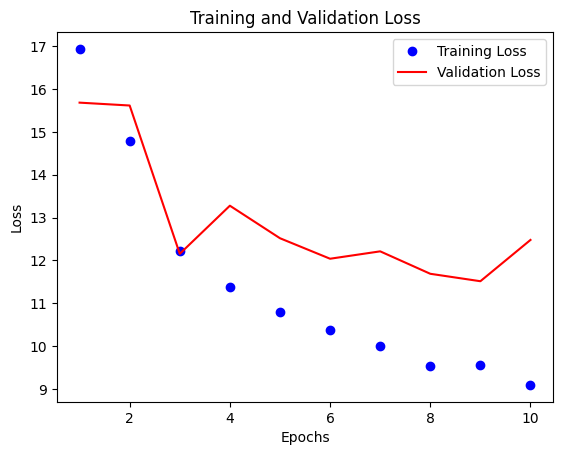

In [ ]:
evaluation_results = Model.evaluate(X_test, Y_test_2)
print("Test Loss:", evaluation_results[0])
print("Sex Classification Accuracy:", evaluation_results[3])
print("Age Regression MAE:", evaluation_results[4])

import matplotlib.pyplot as plt

# Extracting loss data from history object
training_loss = History.history['loss']
validation_loss = History.history['val_loss']
epochs = range(1, len(training_loss) + 1)

# Plotting loss
plt.plot(epochs, training_loss, 'bo', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
pred=Model.predict(X_test)
pred[1]

186/186 [==============================] - 9s 48ms/step


array([[ 4.073278],
       [17.84261 ],
       [16.92299 ],
       ...,
       [19.330204],
       [26.360897],
       [27.37505 ]], dtype=float32)

1/1 [==============================] - 0s 29ms/step
Predicted Age: 22
Predicted Sex: Male


<ipython-input-17-9d4206ce1929>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(pred_1[1][0]))
<ipython-input-17-9d4206ce1929>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(pred_1[0][0]))


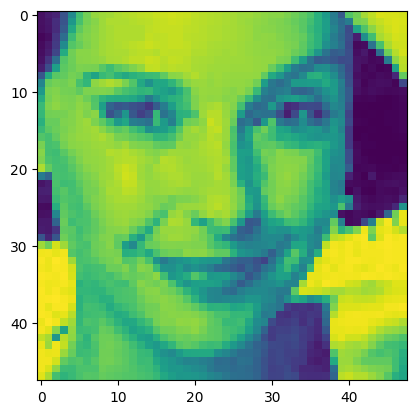

In [ ]:
def test_image(ind,X,Model):

  plt.imshow(X[ind])

  image_test=X[ind]

  pred_1=Model.predict(np.array([image_test]))

  sex_f=['Female','Male']

  age = int(np.round(pred_1[1][0]))
  sex = int(np.round(pred_1[0][0]))

  print("Predicted Age: "+ str(age))

  print("Predicted Sex: "+ sex_f[sex])

test_image(7777,X, Model)

In [ ]:
from PIL import Image
import numpy as np

# Load the JPG image
image_path = "/content/img2.jpg"
image = Image.open(image_path)

image = image.convert("L")

# Resize the image to 48x48 if needed
image = image.resize((48, 48))

# Convert the image to a NumPy array
pixel_values = np.array(image, dtype='float32')

# Normalize the pixel values
normalized_pixels = pixel_values / 255.0

# Reshape the pixel values
reshaped_pixels = np.reshape(normalized_pixels, (48, 48))

# Now you can use the reshaped_pixels array for further processing


1/1 [==============================] - 0s 23ms/step
Predicted Age: 23
Predicted Sex: Male


<ipython-input-21-771dee8ce440>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(pred_1[1][0]))
<ipython-input-21-771dee8ce440>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(pred_1[0][0]))


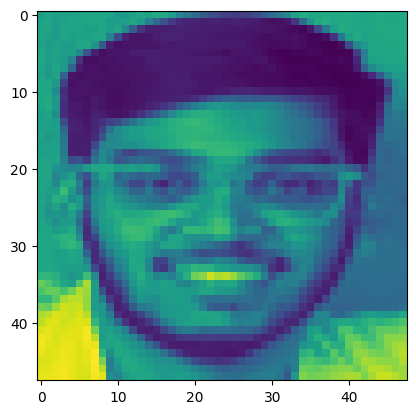

In [ ]:
pred_1=Model.predict(np.array([reshaped_pixels]))

sex_f=['Male','Female']
age = int(np.round(pred_1[1][0]))
sex = int(np.round(pred_1[0][0]))
print("Predicted Age: "+ str(age))
print("Predicted Sex: "+ sex_f[sex])
plt.imshow(reshaped_pixels)